Problem Statement

Training deficiencies for an anonymous department in an organisation have been collected from 2016 to 2020. It is worth noting that the COV19 pandemic started in early 2020 and this would have an effect on the training deficiencies.

The task is to analyse this data to look for trends.

Load libraries

In [780]:
import pandas as pd
import numpy as np

Import csv file

In [781]:
df = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Misc-Predictions/main/Anon%20Training%20Deficiency%20-%20Anon%20Training%20Deficiency%20(1).csv',parse_dates=['Month Year'], index_col=['Month Year'])
df


,Training Deficiency
Month Year,
Jun-16,111
Jul-16,124
Aug-16,133
Sep-16,139
Oct-16,131
Nov-16,149
Dec-16,171
Jan-17,189
Feb-17,207


Visualise time series

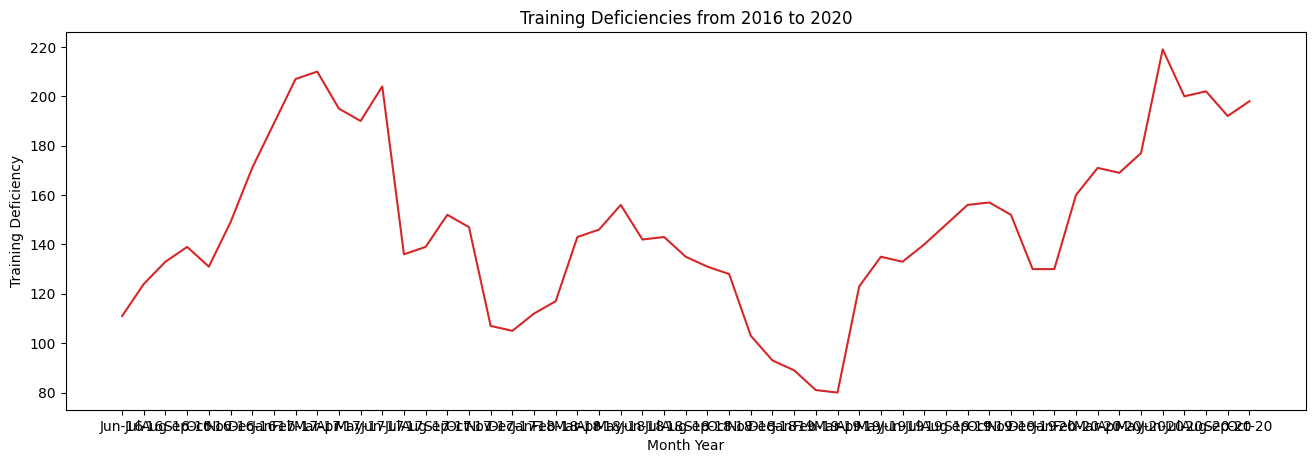

In [782]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='Month Year', ylabel='Training Deficiency', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Training Deficiency'], title='Training Deficiencies from 2016 to 2020') 

Show both sides of y axis

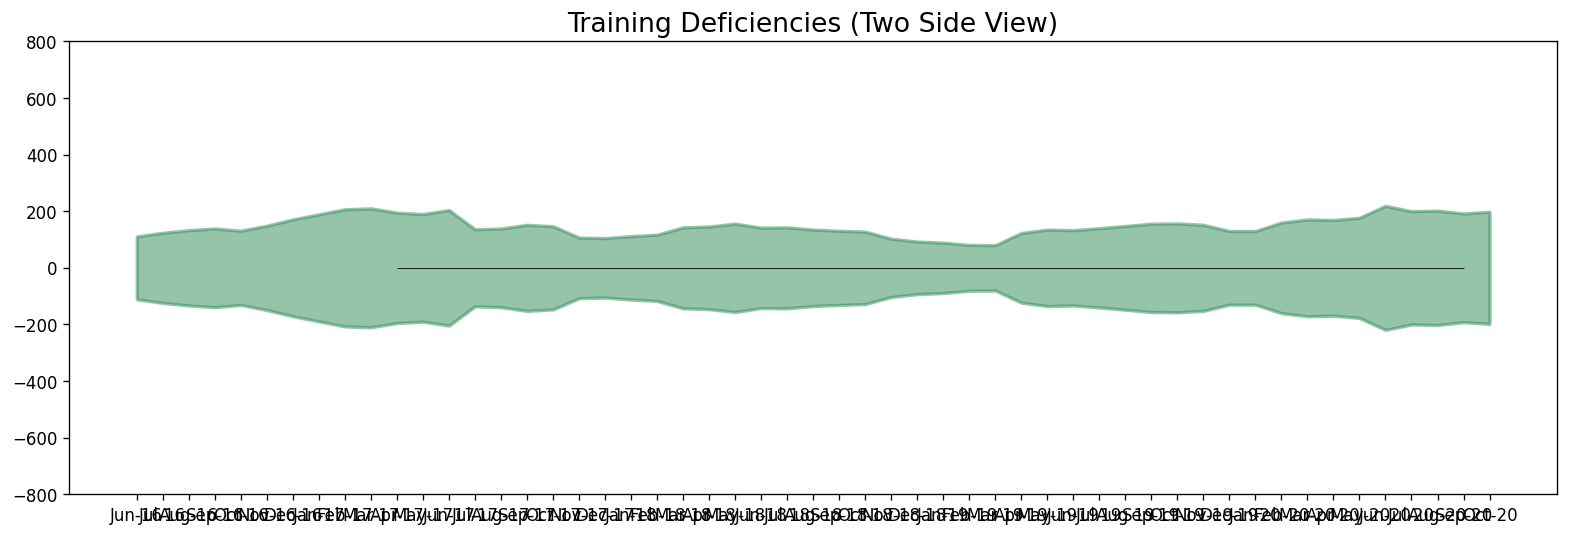

In [783]:
x = df.index.values
y1 = df['Training Deficiency'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Training Deficiencies (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

Define X and y variables

In [784]:
X = df.index.factorize()[0].reshape(-1,1) 
y = df['Training Deficiency'].values

Split dataset for training and testing

In [785]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=0)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((37, 1), (37,), (16, 1), (16,))

Define model

Linear Regression

In [786]:
from sklearn import linear_model

model = linear_model.LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.08999402407396373


In [787]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

-0.46414397253235395


In [788]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,130,164.617361
1,81,158.110129
2,148,161.659528
3,80,158.701695
4,190,145.687231
5,133,140.363133
6,89,157.518562
7,152,163.434228
8,103,156.335429
9,135,154.560730


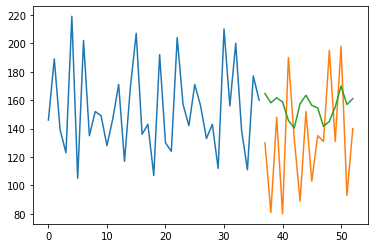

In [789]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

Ridge

In [790]:
from sklearn.linear_model import Ridge

model = Ridge().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.08999402302141413


In [791]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

-0.46412313759975343


In [792]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,130,164.616221
1,81,158.109693
2,148,161.658709
3,80,158.701196
4,190,145.688139
5,133,140.364616
6,89,157.518191
7,152,163.433216
8,103,156.335185
9,135,154.560678


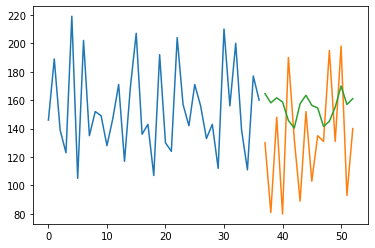

In [793]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

Lasso

In [794]:
from sklearn import linear_model

model = linear_model.Lasso(alpha=.1).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.08999398288957772


In [795]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

-0.46401366428044755


In [796]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,130,164.610233
1,81,158.107403
2,148,161.654401
3,80,158.698570
4,190,145.692910
5,133,140.372413
6,89,157.516237
7,152,163.427901
8,103,156.333904
9,135,154.560405


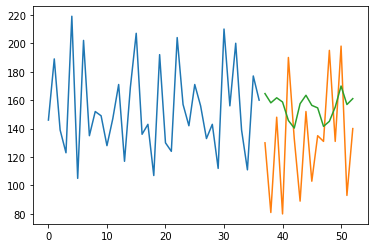

In [797]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

ElastiNet

In [798]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(random_state=0).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.08999142639213953


In [799]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

-0.46311035726993754


In [800]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,130,164.560753
1,81,158.088482
2,148,161.618812
3,80,158.676871
4,190,145.732328
5,133,140.436834
6,89,157.500094
7,152,163.383977
8,103,156.323318
9,135,154.558153


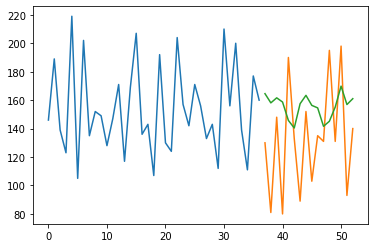

In [801]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

Create lagged dataset

In [802]:
# Create lagged dataset
from pandas import DataFrame
from pandas import concat

values = DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe)

      t-1  t+1
0     NaN  111
1   111.0  124
2   124.0  133
3   133.0  139
4   139.0  131
5   131.0  149
6   149.0  171
7   171.0  189
8   189.0  207
9   207.0  210
10  210.0  195
11  195.0  190
12  190.0  204
13  204.0  136
14  136.0  139
15  139.0  152
16  152.0  147
17  147.0  107
18  107.0  105
19  105.0  112
20  112.0  117
21  117.0  143
22  143.0  146
23  146.0  156
24  156.0  142
25  142.0  143
26  143.0  135
27  135.0  131
28  131.0  128
29  128.0  103
30  103.0   93
31   93.0   89
32   89.0   81
33   81.0   80
34   80.0  123
35  123.0  135
36  135.0  133
37  133.0  140
38  140.0  148
39  148.0  156
40  156.0  157
41  157.0  152
42  152.0  130
43  130.0  130
44  130.0  160
45  160.0  171
46  171.0  169
47  169.0  177
48  177.0  219
49  219.0  200
50  200.0  202
51  202.0  192
52  192.0  198


In [803]:
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [804]:
# persistence model
def model_persistence(x):
	return x

In [805]:
# walk-forward validation
from sklearn.metrics import mean_squared_error

predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 317.789


In [806]:
predictions

[80.0,
 123.0,
 135.0,
 133.0,
 140.0,
 148.0,
 156.0,
 157.0,
 152.0,
 130.0,
 130.0,
 160.0,
 171.0,
 169.0,
 177.0,
 219.0,
 200.0,
 202.0,
 192.0]

In [807]:
print(model.score(test_y.reshape(-1,1),predictions))

-5.3330806936136845


In [808]:
df_val=pd.DataFrame({'Actual': test_y, 'Predicted': predictions})
df_val

,Actual,Predicted
0,123.0,80.0
1,135.0,123.0
2,133.0,135.0
3,140.0,133.0
4,148.0,140.0
5,156.0,148.0
6,157.0,156.0
7,152.0,157.0
8,130.0,152.0
9,130.0,130.0


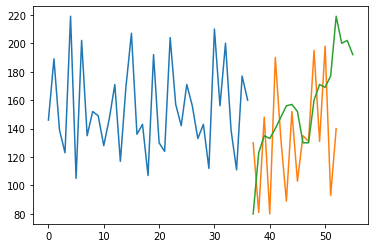

In [809]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in predictions])
pyplot.show()

Polynomial Regression 4th degree

In [810]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.57495166507664


In [811]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.6042833523881839


In [812]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,130,166.126210
1,81,120.435198
2,148,140.421614
3,80,122.541234
4,190,169.632704
5,133,141.350794
6,89,118.881272
7,152,155.421782
8,103,117.471179
9,135,119.566165


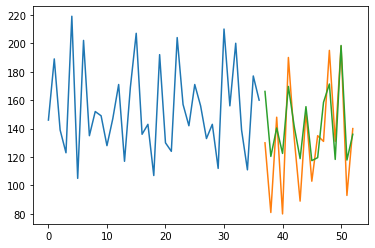

In [813]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

Polynomial Regression 10th degree

In [814]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 10
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.8259507072093207


In [815]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.018132311694823877


In [816]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,130,156.891839
1,81,129.875047
2,148,140.604966
3,80,128.097873
4,190,185.954960
5,133,120.468722
6,89,132.820030
7,152,152.611091
8,103,140.120174
9,135,145.998972


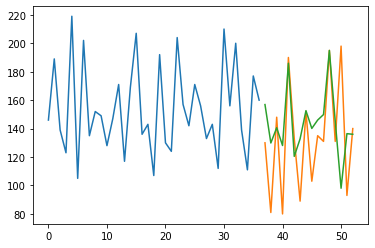

In [817]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

Numpy Polyfit

In [818]:
df = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Misc-Predictions/main/Anon%20Training%20Deficiency%20-%20Anon%20Training%20Deficiency%20(1).csv',parse_dates=['Month Year'])
df

,Month Year,Training Deficiency
0,Jun-16,111
1,Jul-16,124
2,Aug-16,133
3,Sep-16,139
4,Oct-16,131
5,Nov-16,149
6,Dec-16,171
7,Jan-17,189
8,Feb-17,207
9,Mar-17,210


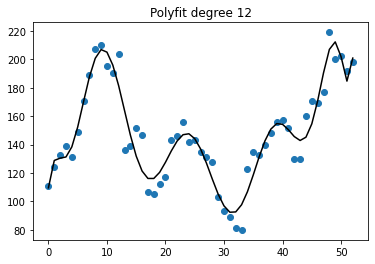

In [819]:
X = df.index
y = df['Training Deficiency']
degree = 12

coefs = np.polyfit(X, y, degree)

plt.figure()
plt.plot(X, np.polyval(coefs, X),color="black")
plt.title("Polyfit degree " + str(degree))
plt.scatter(X,y)
plt.show()